# Lab 5 (2/10): Working with data

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

Today, we will look at what people order at Chipotle. Some example questions we are interested in are:
- How much do people spend on average at Chipotle?
- Do people prefer bowls or burritos?
- What percentage of people order drinks?


Recall the following commands from `dplyr`:

1. `group_by`
2. `summarize`:  `df = df %>% group_by(groupvar) %>% summarize(newvar = mean(oldvar))`
3. `mutate`: `df = df %>% mutate(newvar = oldvar + sqrt(oldvar2))`
4. `filter`: `df = df %>% filter(compvar == 'something')`

Some other functions that may come in handy are:

1. `top_n` from `dplyr`
2. `sum`, `max`, and `min` from base R


In [21]:
# Setup and read in data
library(dplyr)
library(ggplot2)
library(stringr)
df = read.csv("https://raw.githubusercontent.com/rogerfan/stats306_w20/master/labs/chipotle.csv", stringsAsFactors=F)
df$X = NULL

In [2]:
head(df)

,order_id,quantity,item_name,choice_description,item_price
,<int>,<int>,<chr>,<chr>,<chr>
1,1,1,Chips and Fresh Tomato Salsa,,$2.39
2,1,1,Izze,[Clementine],$3.39
3,1,1,Nantucket Nectar,[Apple],$3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98


### Q1: What are the five most popular items?

In [74]:
df %>% group_by(item_name) %>% summarize(itemsold = n()) %>% arrange(desc(itemsold)) %>% top_n(5)
df %>% group_by(item_name) %>% summarize(itemsold = sum(quantity)) %>% arrange(desc(itemsold)) %>% top_n(5)

Selecting by itemsold


item_name,itemsold
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


Selecting by itemsold


item_name,itemsold
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


### Q2: `item_price` is currently a string. Remove the dollar sign and convert it to a numerical variable

Save this new dataset as `df_clean`.

Hint: Consider the functions `str_replace` and `as.numeric`. Note that to replace dollar signs in the string you will need to use `'\\$'` in `str_replace`.

In [32]:
df_clean = df %>% mutate(item_price = as.numeric(str_replace(item_price, '\\$', '')))
head(df_clean)

,order_id,quantity,item_name,choice_description,item_price
,<int>,<int>,<chr>,<chr>,<dbl>
1,1,1,Chips and Fresh Tomato Salsa,,2.39
2,1,1,Izze,[Clementine],3.39
3,1,1,Nantucket Nectar,[Apple],3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


### Q3: Construct a summary table by item type

For each item type, the table should contain the total revenue, the number of items sold, and the max, mean, and minimum prices. Sort the table by items sold in decreasing order.

I have done this for you, and my solution is:

In [33]:
pricetable = df_clean %>% group_by(item_name) %>% 
    summarize(revenue = sum(item_price), 
              itemsold = n(),
              meanprice = mean(item_price),
              maxprice = max(item_price),                       
              minprice = min(item_price)) %>% 
    arrange(desc(itemsold))
head(pricetable)

item_name,revenue,itemsold,meanprice,maxprice,minprice
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Chicken Bowl,7342.73,726,10.113953,32.94,8.19
Chicken Burrito,5575.82,553,10.082857,35.00,8.19
Chips and Guacamole,2201.04,479,4.595073,17.80,3.89
Steak Burrito,3851.43,368,10.465842,27.75,8.69
Canned Soft Drink,438.75,301,1.457641,5.00,1.25
Chips,494.34,211,2.342844,6.45,1.99


Does anything look strange about this summary?

### Q4: What is the issue? Can you figure out the mistake in the code above?

Hint: Think about how you might find some of the problematic rows and look at them closely.

In [34]:
df_clean %>% filter(item_price >= 30)

order_id,quantity,item_name,choice_description,item_price
<int>,<int>,<chr>,<chr>,<dbl>
178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Guacamole, Lettuce]]",32.94
511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Lettuce]]",35.00
1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",35.25
1443,15,Chips and Fresh Tomato Salsa,,44.25
1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole]]",33.75
1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",35.00


### How would you fix the code in Q3?

In [35]:
pricetable = df_clean %>% group_by(item_name) %>% 
             summarize(revenue = sum(item_price), 
                       itemsold = sum(quantity),
                       meanprice = revenue/itemsold,
                       maxprice = max(item_price/quantity),
                       minprice = min(item_price/quantity)) %>% 
             arrange(desc(revenue)) 
head(pricetable)

item_name,revenue,itemsold,meanprice,maxprice,minprice
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Chicken Bowl,7342.73,761,9.648791,11.25,8.19
Chicken Burrito,5575.82,591,9.434552,11.25,8.19
Steak Burrito,3851.43,386,9.977798,11.75,8.69
Steak Bowl,2260.19,221,10.227104,11.75,8.69
Chips and Guacamole,2201.04,506,4.349881,4.45,3.89
Chicken Salad Bowl,1228.75,123,9.989837,11.25,8.75


### Q4: Calculate the total price for each order. Plot a histogram of order prices.

Save this new dataframe in the variable `totalprice`.

In [36]:
totalprice = df_clean %>% group_by(order_id) %>% summarize(tprice = sum(item_price))
head(totalprice)

order_id,tprice
<int>,<dbl>
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
6,17.50


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



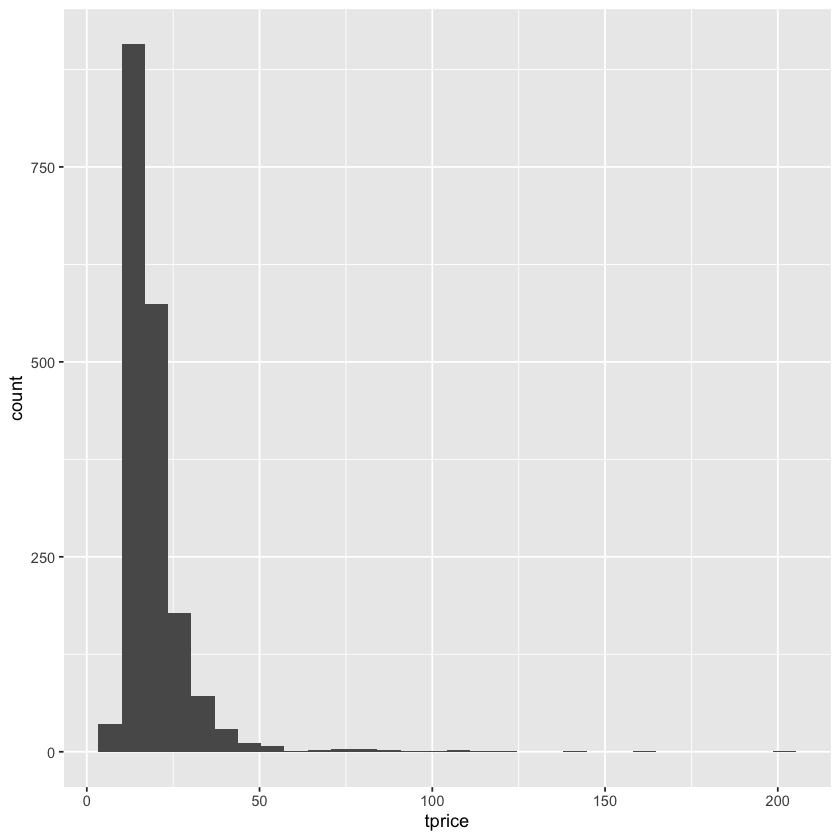

In [37]:
ggplot(totalprice, aes(x=tprice)) + geom_histogram()

Note how extreme outliers can make it difficult to interpret plots.

### Q5: Change the data/plot in Q4 so that it only contains orders with prices below 40. Try different binwidths to see if your interpretations change.

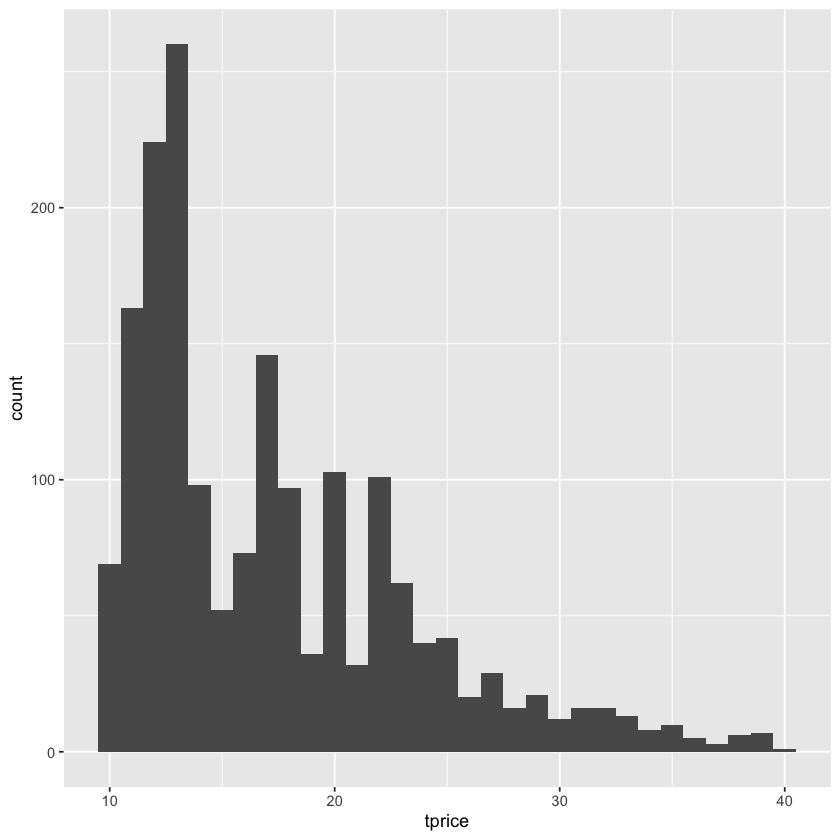

In [38]:
totalprice_lt20 = totalprice %>% filter(tprice < 40)
ggplot(totalprice_lt20, aes(x=tprice)) + geom_histogram(binwidth=1)

How do your spending habits at Chipotle compare to those who are in the dataset?

### Q6: Are bowls, burritos, or tacos more popular? Create a bar plot of amount sold of each.

To extract whether an item is a bowl, burrito, or taco, you can use the following code:

In [43]:
df_withtype = df_clean %>% 
    mutate(type = case_when(str_detect(item_name, "Bowl") ~ "Bowl",
                            str_detect(item_name, "Burrito") ~ "Burrito",
                            str_detect(item_name, "Tacos") ~ "Tacos",
                            TRUE ~ "neither"))
bowburtacotable = df_withtype %>% filter(type != "neither") 
head(bowburtacotable)

,order_id,quantity,item_name,choice_description,item_price,type
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,Bowl
2,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98,Bowl
3,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.75,Burrito
4,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,Tacos
5,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,Burrito
6,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]",8.75,Tacos


Note the usage of the function `case_when` from tidyverse. Look up the documentation and make sure you understand how this function works.

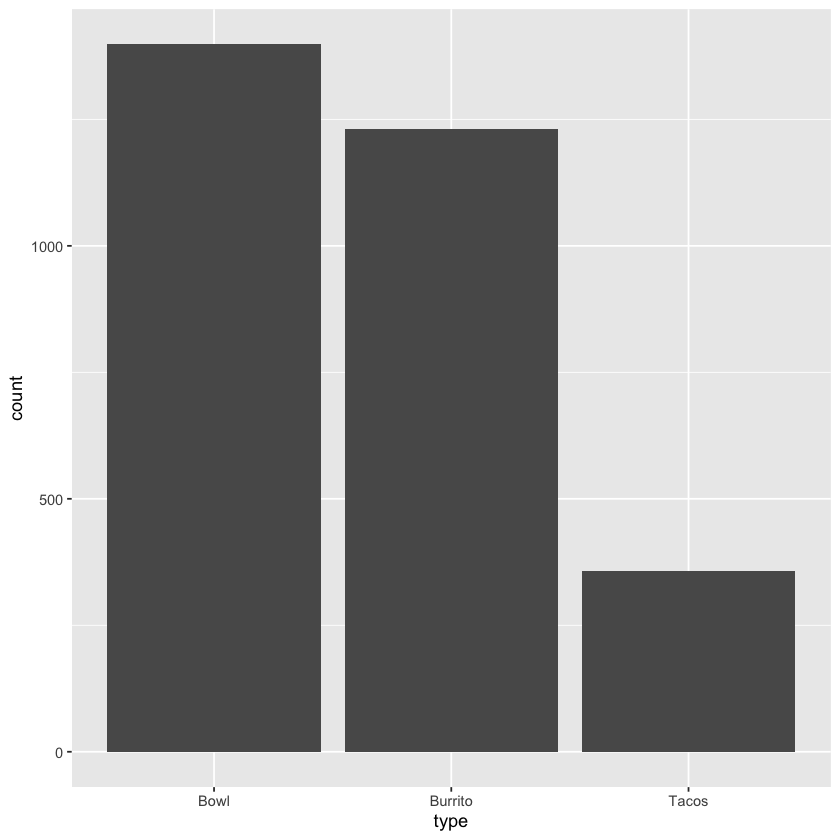

In [44]:
ggplot(bowburtacotable, aes(x=type)) + geom_bar(aes(weight=quantity))

### What about the different fillings (Chicken, Steak, Barbacoa, Carnitas, Veggie)? Color the above bar chart by type of filling.

Note that you will have to do some additional data transformation using the intermediate dataset `df_withtype`.

In [46]:
df_withfill = df_withtype %>% 
    mutate(meat = case_when(str_detect(item_name, "Chicken") ~ "Chicken",
                            str_detect(item_name, "Steak") ~ "Steak",
                            str_detect(item_name, "Barbacoa") ~ "Barbacoa",
                            str_detect(item_name, "Carnitas") ~ "Carnitas",
                            str_detect(item_name, "Veggie") ~ "Veggie",
                            TRUE ~ "other"))
bowburtacotable = df_withfill %>% filter(type != "neither") %>% filter(meat != "other") 
head(bowburtacotable)

,order_id,quantity,item_name,choice_description,item_price,type,meat
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,Bowl,Chicken
2,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98,Bowl,Chicken
3,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.75,Burrito,Steak
4,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,Tacos,Steak
5,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,Burrito,Steak
6,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]",8.75,Tacos,Chicken


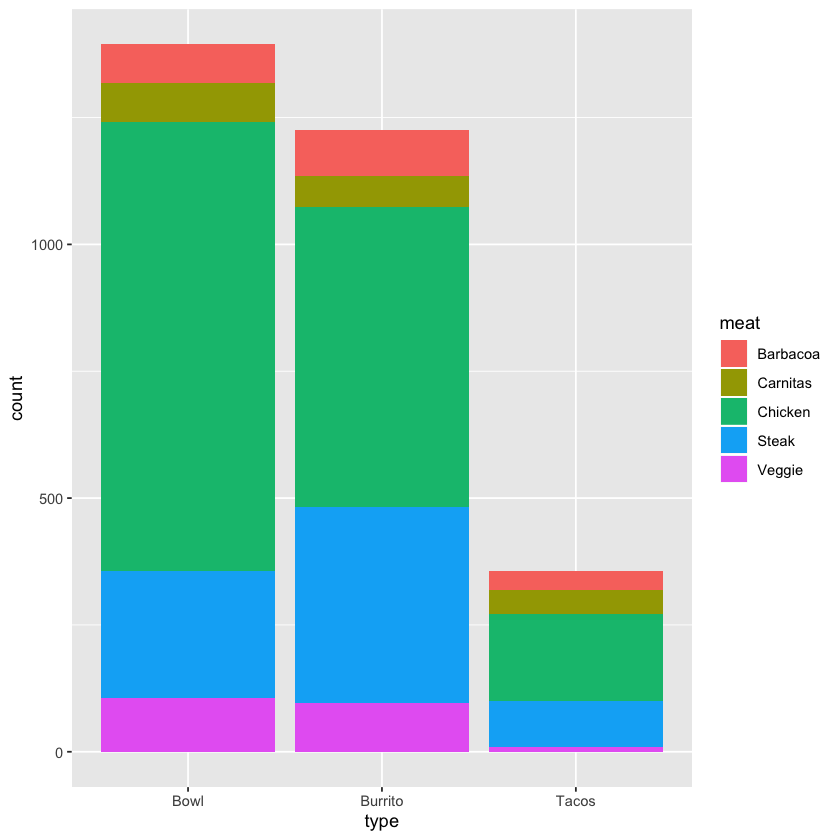

In [47]:
ggplot(bowburtable, aes(x=type, fill=meat)) + geom_bar(aes(weight=quantity))

### Is there a modification you can make to the default bar chart to better compare how the proportion of fillings differs across order types more easily?

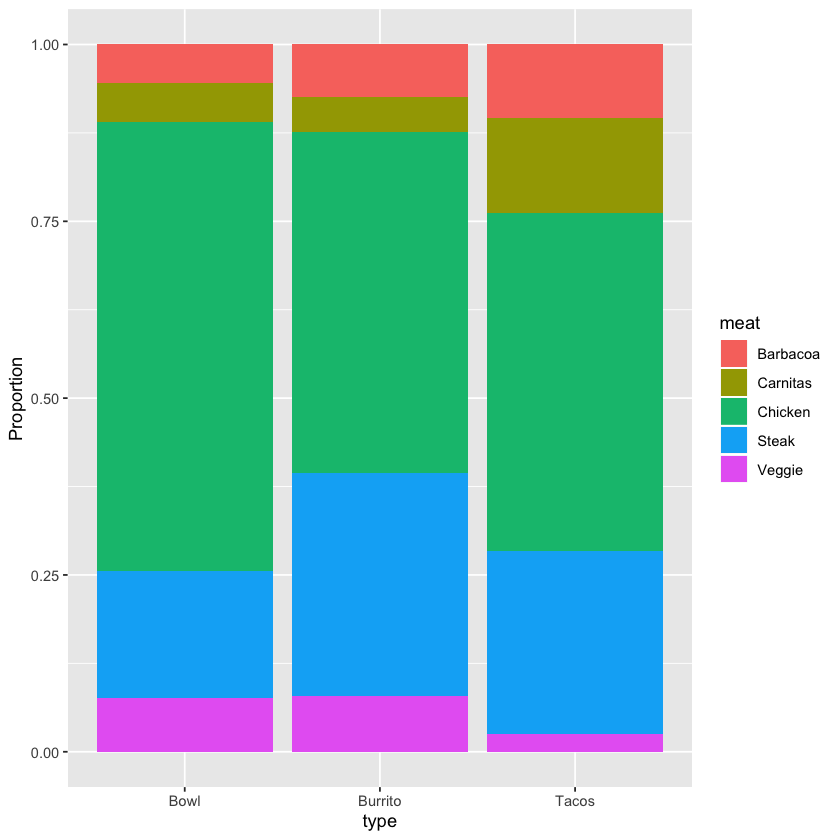

In [48]:
ggplot(bowburtacotable, aes(x=type, fill=meat)) + geom_bar(aes(weight=quantity), position='fill') + ylab('Proportion')

### Q7: How many orders contain at least one drink of any kind? How many don't have a drink?

To detect multiple things in `str_detect`, you can separate the items with pipes `|`. For example:

In [49]:
unique(df$item_name)

[1] "Chips and Fresh Tomato Salsa"         
 [2] "Izze"                                 
 [3] "Nantucket Nectar"                     
 [4] "Chips and Tomatillo-Green Chili Salsa"
 [5] "Chicken Bowl"                         
 [6] "Side of Chips"                        
 [7] "Steak Burrito"                        
 [8] "Steak Soft Tacos"                     
 [9] "Chips and Guacamole"                  
[10] "Chicken Crispy Tacos"                 
[11] "Chicken Soft Tacos"                   
[12] "Chicken Burrito"                      
[13] "Canned Soda"                          
[14] "Barbacoa Burrito"                     
[15] "Carnitas Burrito"                     
[16] "Carnitas Bowl"                        
[17] "Bottled Water"                        
[18] "Chips and Tomatillo Green Chili Salsa"
[19] "Barbacoa Bowl"                        
[20] "Chips"                                
[21] "Chicken Salad Bowl"                   
[22] "Steak Bowl"                           
[23] "Barbacoa Soft Tacos"                  
[24] "Veggie Burrito"                       
[25] "Veggie Bowl"                          
[26] "Steak Crispy Tacos"                   
[27] "Chips and Tomatillo Red Chili Salsa"  
[28] "Barbacoa Crispy Tacos"                
[29] "Veggie Salad Bowl"                    
[30] "Chips and Roasted Chili-Corn Salsa"   
[31] "Chips and Roasted Chili Corn Salsa"   
[32] "Carnitas Soft Tacos"                  
[33] "Chicken Salad"                        
[34] "Canned Soft Drink"                    
[35] "Steak Salad Bowl"                     
[36] "6 Pack Soft Drink"                    
[37] "Chips and Tomatillo-Red Chili Salsa"  
[38] "Bowl"                                 
[39] "Burrito"                              
[40] "Crispy Tacos"                         
[41] "Carnitas Crispy Tacos"                
[42] "Steak Salad"                          
[43] "Chips and Mild Fresh Tomato Salsa"    
[44] "Veggie Soft Tacos"                    
[45] "Carnitas Salad Bowl"                  
[46] "Barbacoa Salad Bowl"                  
[47] "Salad"                                
[48] "Veggie Crispy Tacos"                  
[49] "Veggie Salad"                         
[50] "Carnitas Salad"

order_id,containdrink
<int>,<lgl>
1,TRUE
2,FALSE
3,FALSE
4,FALSE
5,FALSE
6,FALSE


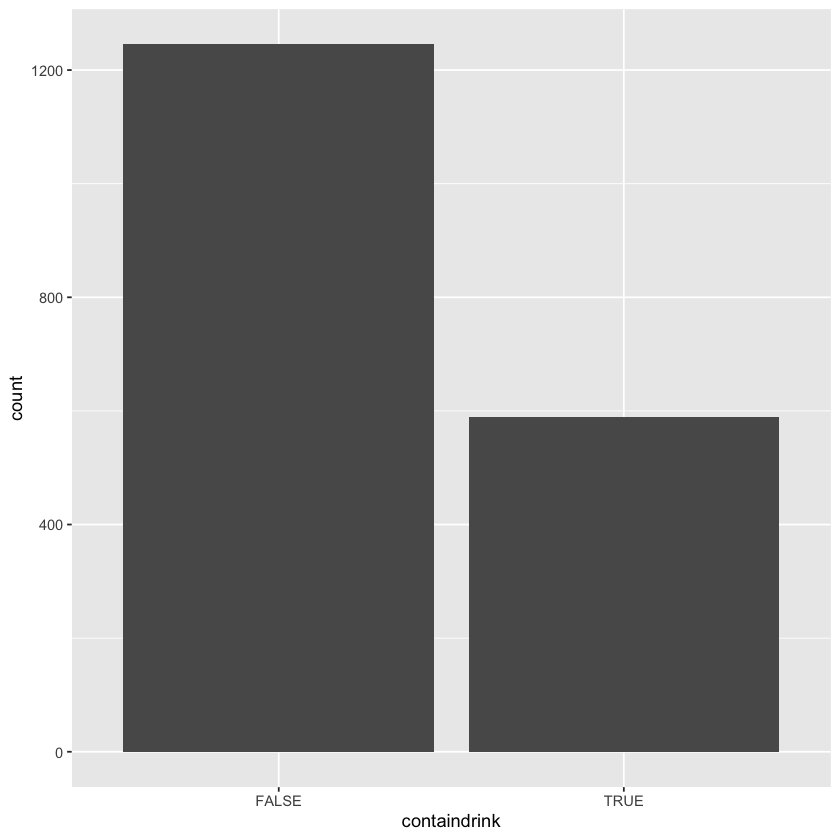

In [50]:
df_drink = df %>% mutate(ifdrink = str_detect(item_name, "Drink|Water|Soda|Izze|Nantucket Nectar"))
drinkbyorder = df_drink %>% group_by(order_id) %>% summarize(containdrink = sum(ifdrink) > 0) 

head(drinkbyorder)
ggplot(drinkbyorder, aes(x=containdrink)) + geom_bar()

### Bonus Question: Suppose non-drink items have a 20% profit margin and drinks have a 50% profit margin. What percentage of the total profit comes from drinks?